<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Autocorrelation and time series decomposition practice



---

### Take the AAPL stock data

- Extract the closing prices 
- Decompose the time series 
- Investigate for (partial) autocorrelations

**Bonus:** Resample the data weekly or difference the time series and repeat the same steps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
def autocorr_plots(y, lags=20, alpha=0.05):
    """
    Plot autocorrelations and partial autocorrelations
    Arguments:
    y: Time series
    lags: Number of lags to plot
    alpha: Confidence level for random noise
    """

    se = stats.norm().ppf(1-alpha/2)/np.sqrt(len(y))

    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)

    plot_acf(y, lags=lags, alpha=alpha, ax=ax[0])
    ax[0].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)

    plot_pacf(y, lags=lags, alpha=alpha, ax=ax[1], method='ywmle')
    ax[1].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)

    return fig, ax

In [4]:
df = pd.read_csv('datasets/aapl.csv')

In [5]:
df['Date'] = pd.to_datetime(df.Date)
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)

df.index.name = None
df.head(20)

,Open,High,Low,Close,Volume
2016-01-19,98.41,98.65,95.50,96.66,52841349
2016-01-20,95.10,98.19,93.42,96.79,72008265
2016-01-21,97.06,97.88,94.94,96.30,52054521
2016-01-22,98.63,101.46,98.37,101.42,65562769
2016-01-25,101.52,101.53,99.21,99.44,51196375
2016-01-26,99.93,100.88,98.07,99.99,63538305
2016-01-27,96.04,96.63,93.34,93.42,132224500
2016-01-28,93.79,94.52,92.39,94.09,55557109
2016-01-29,94.79,97.34,94.35,97.34,64010141
2016-02-01,96.47,96.71,95.40,96.43,40571593


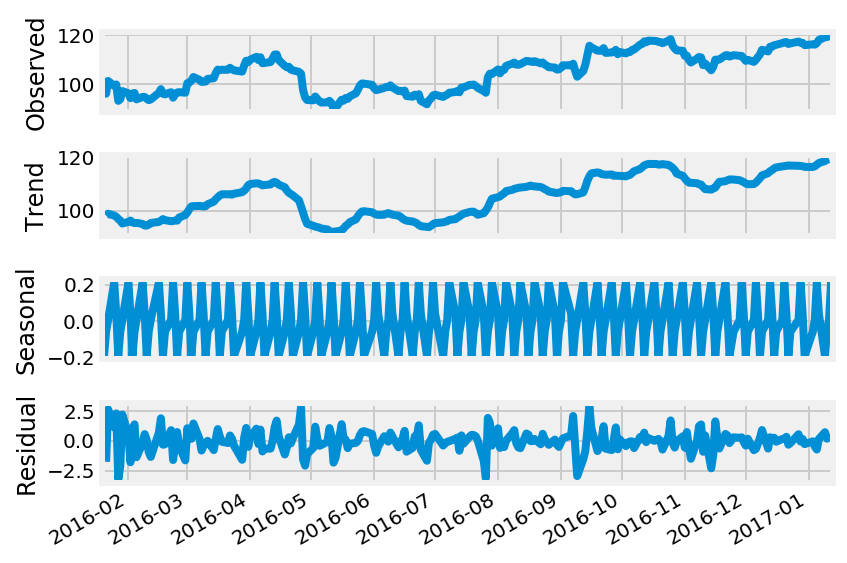

In [6]:
seasonal_decompose(df.Close, freq=5).plot()
plt.show()

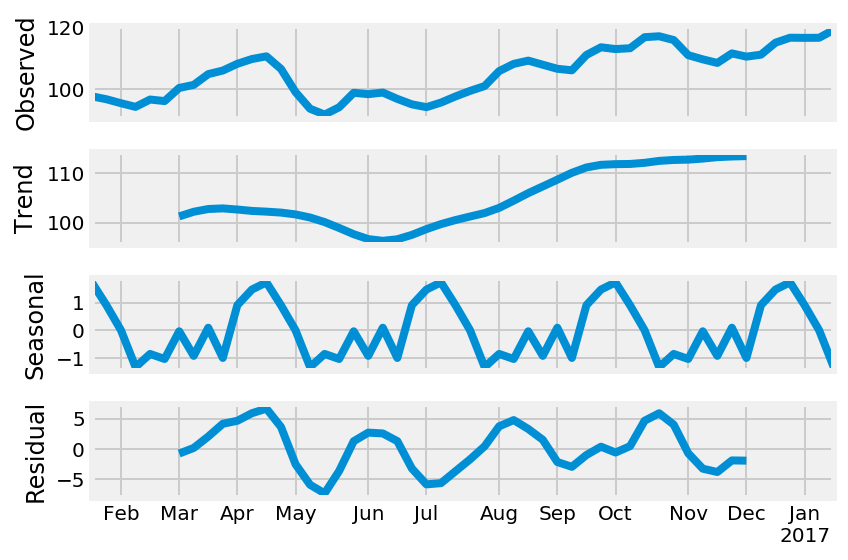

In [7]:
seasonal_decompose(df.Close.resample('W').mean(), freq=12).plot()
plt.show()

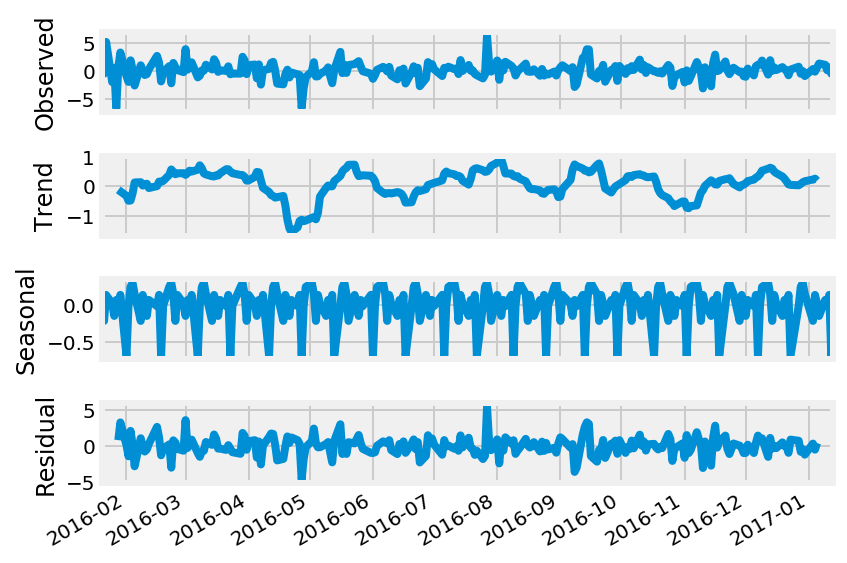

In [8]:
fig = seasonal_decompose(df.Close.diff()[1:], freq=12).plot()

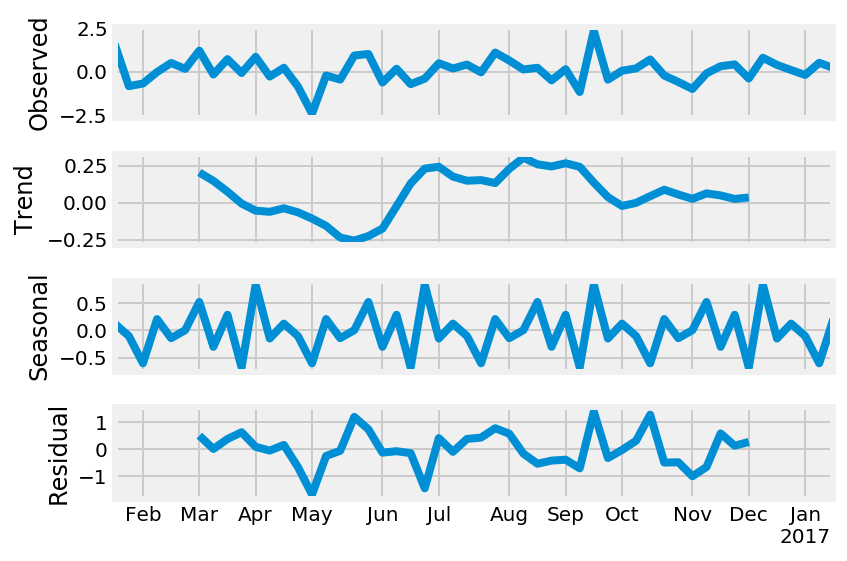

In [9]:
seasonal_decompose(df.Close.diff()[1:].resample('W').mean(), freq=12).plot()
plt.show()

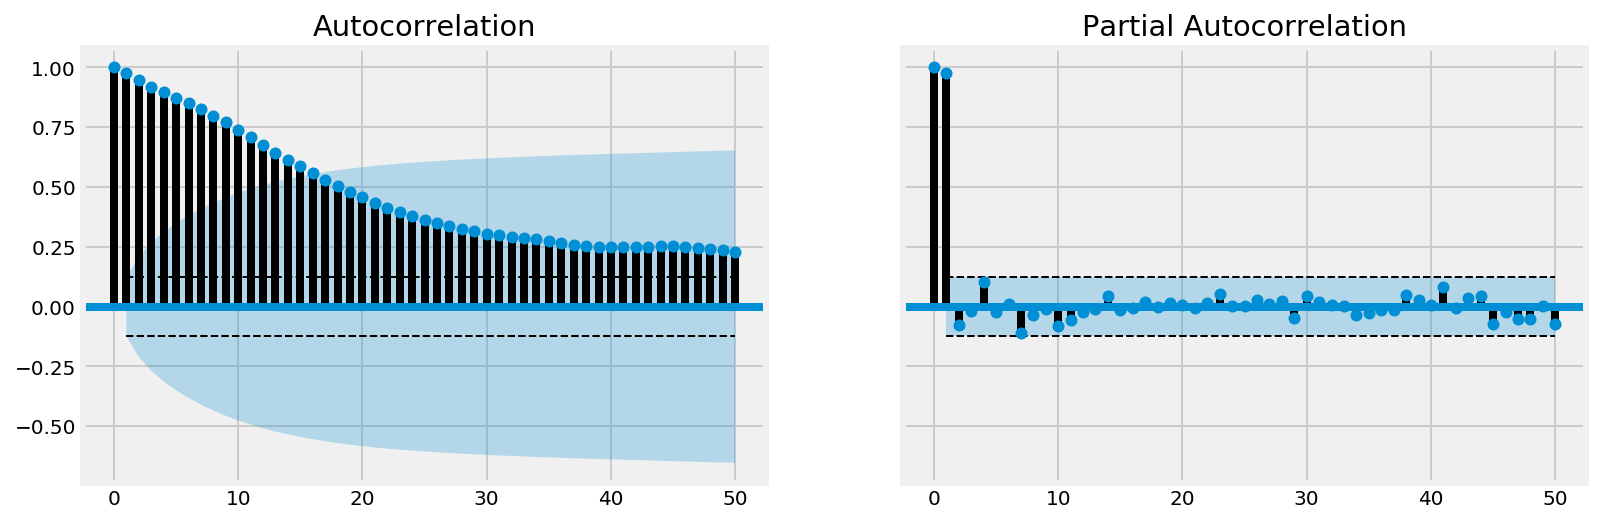

In [10]:
fig, ax = autocorr_plots(df.Close, lags=50)

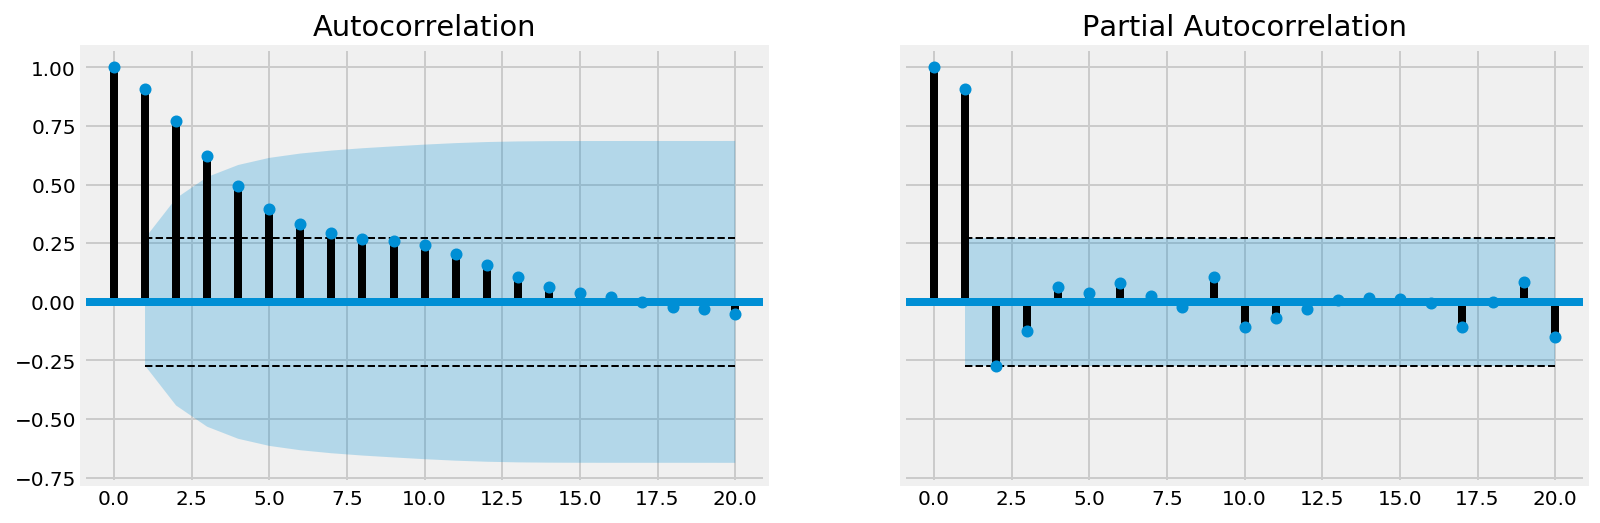

In [11]:
fig, ax = autocorr_plots(df.Close.resample('W').mean(), lags=20)

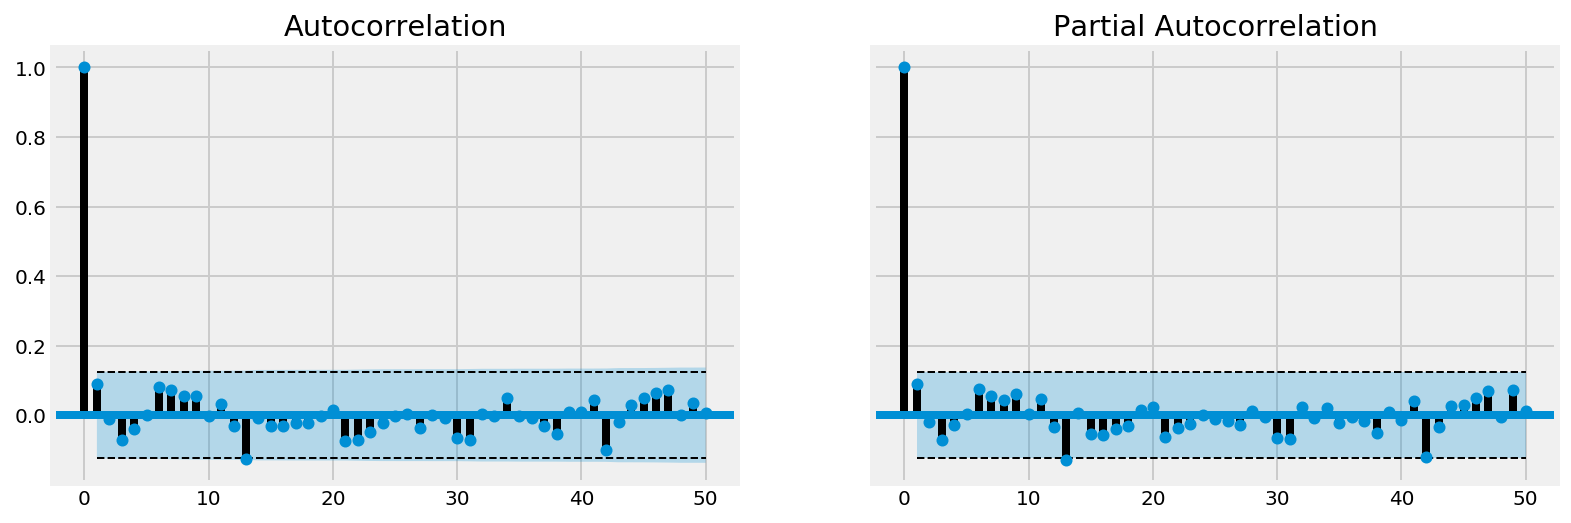

In [12]:
fig, ax = autocorr_plots(df.Close.diff()[1:], lags=50)

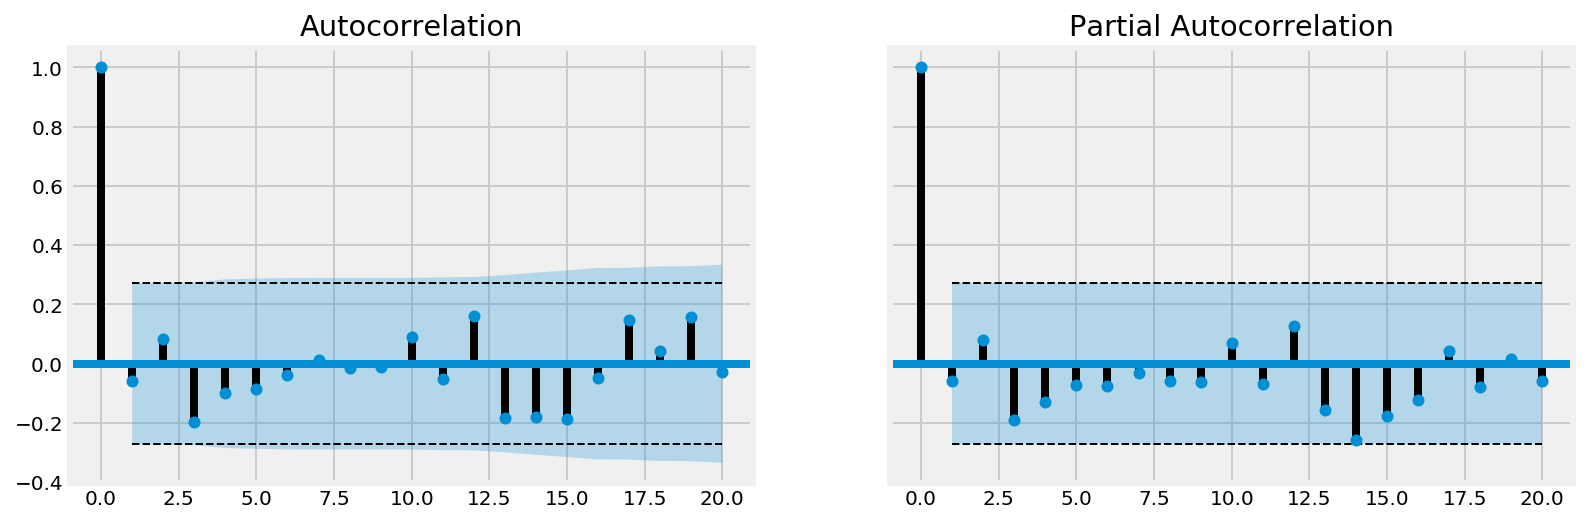

In [13]:
fig, ax = autocorr_plots(df.Close.diff()[1:].resample('W').mean(), lags=20)